<a href="https://colab.research.google.com/github/Offliners/Deep-Learning-note/blob/main/3.5-classifying-movie-reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**載入IMDB資料集**

In [1]:
from keras.datasets import imdb  # 從keras.datasets套件中匯入imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

**從2層的整數list編碼成二元矩陣**

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))  # 建立全為0的矩陣，其形狀為(len(sequences), dimension)，其中len(sequences)為樣本數

  for i, sequence in enumerate(sequences):  # 用enumerate()為每個子串列編號，編號會存到i，子串列存到sequence
    results[i, sequence] = 1.  # 將results[i]中的多個元素(以sequence串列的每個元素值為索引)設為1.0
  
  return results

x_train = vectorize_sequences(train_data)  # 將訓練資料向量化
x_test = vectorize_sequences(test_data)  # 將測試資料向量化
y_train = np.asarray(train_labels).astype('float32')  # 將訓練標籤向量化
y_test = np.asarray(test_labels).astype('float32')  # 將測試標籤向量化

**模型定義**

In [8]:
from keras import models
from keras import layers

model = models.Sequential()  # 使用models模組的Sequential類別，建立一個物件讓新增的神經網路層可以進行堆疊
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))  # 輸入層也是隱藏層
model.add(layers.Dense(16, activation='relu'))  # 隱藏層
model.add(layers.Dense(1, activation='sigmoid'))  # 輸出層

**設定驗證資料集**

In [11]:
x_val = x_train[:10000]  # 取輸入資料的前10000作為驗證資料集
partial_x_train = x_train[10000:]  # 輸入資料的第10000個開始才是訓練資料

y_val = y_train[:10000]  # 對應的，要取標籤的前10000作為驗證標籤
partial_y_train = y_train[10000:]  # 從標籤的第10000個開始才是訓練標籤

**訓練模型**

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])  # 建立訓練模型

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))  # 同時傳入驗證集的資料與標籤

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.6101 - acc: 0.6950 - val_loss: 0.3996 - val_acc: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3407 - acc: 0.8964 - val_loss: 0.3151 - val_acc: 0.8831
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2387 - acc: 0.9282 - val_loss: 0.2837 - val_acc: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1871 - acc: 0.9458 - val_loss: 0.2801 - val_acc: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1557 - acc: 0.9516 - val_loss: 0.2994 - val_acc: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1197 - acc: 0.9659 - val_loss: 0.2878 - val_acc: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0995 - acc: 0.9739 - val_loss: 0.3292 - val_acc: 0.8789
Epoch 8/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0877 - a

**繪製訓練與驗證的損失分數**

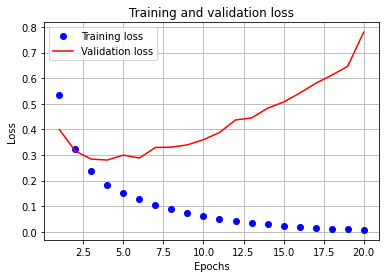

In [14]:
import matplotlib.pyplot as plt  # 匯入matplotlib.pyplot模組並命名為plt

history_dict = history.history
loss_values = history_dict['loss']  # 取得每次訓練的loss訓練損失分數並存成loss_values變數
val_loss_values = history_dict['val_loss']  # 取得每次驗證的val_loss驗證損失分數並存成val_loss_values變數

epochs = range(1, len(loss_values) + 1)  # len(loss_values)項目個數為20，範圍從1到21(不含21)的週期

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

**繪製訓練和驗證的準確度**

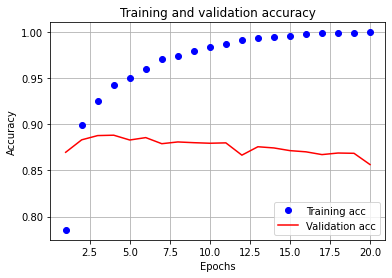

In [15]:
plt.clf()  # 清除圖表
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**重新開始訓練模型**

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)  # 訓練4個週期的神經網路
results = model.evaluate(x_test, y_test)  # 輸入測試資料與測試標進行評估

print(results)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.5559 - accuracy: 0.7355
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2838 - accuracy: 0.9057
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2112 - accuracy: 0.9245
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2911 - accuracy: 0.8842
[0.2910824120044708, 0.8842399716377258]
